In [1]:
import schemdraw
from schemdraw import elements as elm
from schemdraw import logic
from schemdraw import dsp
from schemdraw import flow
from schemdraw.util import Point
#schemdraw.use('svg')

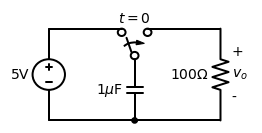

In [2]:
d = schemdraw.Drawing()
d += (V1 := elm.SourceV().label('5V'))
d += elm.Line().right().length(d.unit*.75)
d += (S1 := elm.SwitchSpdt2(action='close').up().anchor('b').label('$t=0$', loc='rgt'))
d += elm.Line().right().at(S1.c).length(d.unit*.75)
d += elm.Resistor().down().label('$100\Omega$').label(['+','$v_o$','-'], loc='bot')
d += elm.Line().to(V1.start)
d += elm.Capacitor().down().at(S1.a).toy(V1.start).label('1$\mu$F')
d += elm.Dot()
d.draw()


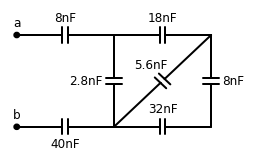

In [5]:
d = schemdraw.Drawing(fontsize=12)
A  = d.add(elm.Dot().label('a'))
C1 = d.add(elm.Capacitor().label('8nF'))
C2 = d.add(elm.Capacitor().label('18nF'))
C3 = d.add(elm.Capacitor().down().label('8nF', loc='bottom'))
C4 = d.add(elm.Capacitor().left().label('32nF'))
C5 = d.add(elm.Capacitor().label('40nF', loc='bottom'))
B  = d.add(elm.Dot().label('b'))
C6 = d.add(elm.Capacitor().endpoints(C1.end,C5.start).label('2.8nF'))
C7 = d.add(elm.Capacitor().endpoints(C2.end,C5.start).label(
           '5.6nF', loc='center', ofst=(-.3, -.1), halign='right', valign='bottom'))
d.draw()

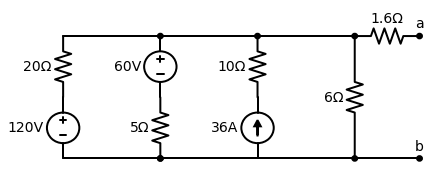

In [6]:
d = schemdraw.Drawing(unit=2)  # unit=2 makes elements have shorter than normal leads
d.push()
d += (R1 := elm.Resistor().down().label('20Ω'))
d += (V1 := elm.SourceV().down().reverse().label('120V'))
d += elm.Line().right().length(3)
d += elm.Dot()
d.pop()
d += elm.Line().right().length(3)
d += elm.Dot()
d += elm.SourceV().down().reverse().label('60V')
d += elm.Resistor().label('5Ω')
d += elm.Dot()
d += elm.Line().right().length(3)
d += elm.SourceI().up().label('36A')
d += elm.Resistor().label('10Ω')
d += elm.Dot()
d += elm.Line().left().length(3).hold()
d += elm.Line().right().length(3)
d += elm.Dot()
d += (R6 := elm.Resistor().down().toy(V1.end).label('6Ω'))
d += elm.Dot()
d += elm.Line().left().length(3).hold()
d += elm.Resistor().right().at(R6.start).label('1.6Ω')
d += elm.Dot().label('a')
d += elm.Line().right().at(R6.end)
d += elm.Dot().label('b')
d.draw()


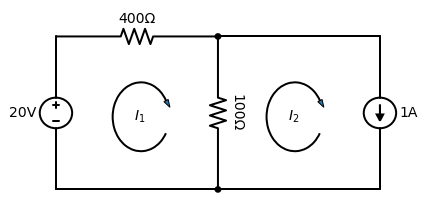

In [7]:
d = schemdraw.Drawing(unit=5)
d += (V1 := elm.SourceV().label('20V'))
d += (R1 := elm.Resistor().right().label('400Ω'))
d += elm.Dot()
d.push()
d += (R2 := elm.Resistor().down().label('100Ω', loc='bot', rotate=True))
d += elm.Dot()
d.pop()
d += (L1 := elm.Line())
d += (I1 := elm.SourceI().down().label('1A', loc='bot'))
d += (L2 := elm.Line().left().tox(V1.start))
d.loopI([R1,R2,L2,V1], '$I_1$', pad=1.25)
d.loopI([R1,I1,L2,R2], '$I_2$', pad=1.25)  # Use R1 as top element for both so they get the same height
d.draw()

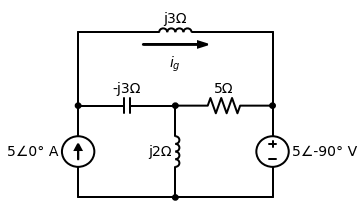

In [8]:
d = schemdraw.Drawing()
d += (I1 := elm.SourceI().label('5∠0° A'))
d += elm.Dot()
d.push()
d += elm.Capacitor().right().label('-j3Ω')
d += elm.Dot()
d.push()
d += elm.Inductor().down().label('j2Ω')
d += elm.Dot()
d.pop()
d += elm.Resistor().right().label('5Ω')
d += elm.Dot()
d += (V1 := elm.SourceV().down().reverse().label('5∠-90° V', loc='bot'))
d += elm.Line().left().tox(I1.start)
d.pop()
d += elm.Line().up().length(d.unit*.8)
d += (L1 := elm.Inductor().right().tox(V1.start).label('j3Ω'))
d += elm.Line().down().length(d.unit*.8)
d.labelI(L1, '$i_g$', top=False)
d.draw()

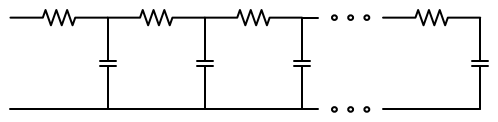

In [9]:
d1 = schemdraw.Drawing()
d1 += elm.Resistor()
d1.push()
d1 += elm.Capacitor().down()
d1 += elm.Line().left()
d1.pop()

d2 = schemdraw.Drawing()
for i in range(3):
    d2 += elm.ElementDrawing(d1)

d2.push()
d2 += elm.Line().length(d2.unit/6)
d2 += elm.DotDotDot()
d2 += elm.ElementDrawing(d1)
d2.pop()
d2.here = (d2.here[0], d2.here[1]-d2.unit)
d2 += elm.Line().right().length(d2.unit/6)
d2 += elm.DotDotDot()
d2.draw()


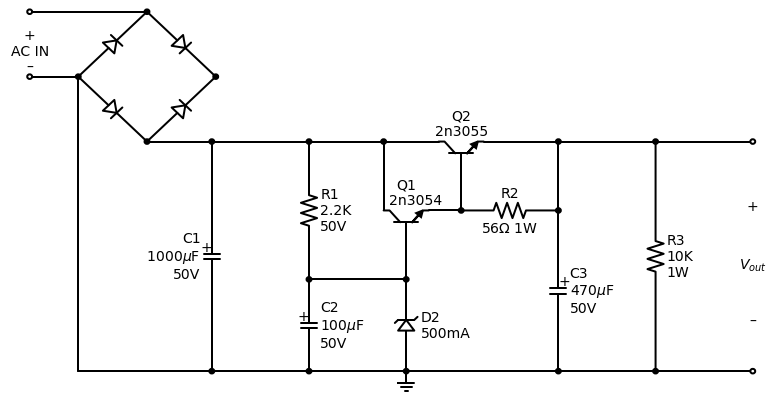

In [10]:
d = schemdraw.Drawing(inches_per_unit=.5, unit=3)
d += (D1 := elm.Diode(d=-45))
d += elm.Dot()
D2 = d.add(elm.Diode(theta=225, reverse=True))
d += elm.Dot()
D3 = d.add(elm.Diode(theta=135, reverse=True))
d += elm.Dot()
D4 = d.add(elm.Diode(theta=45))
d += elm.Dot()

d += elm.Line().left().at(D3.end).length(d.unit/2)
d += elm.Dot(open=True)
d += (G := elm.Gap().up().toy(D1.start).label(['–', 'AC IN', '+']))
d += elm.Line().left().at(D4.end).tox(G.start)
d += elm.Dot(open=True)

d += (top := elm.Line().right().at(D2.end).length(d.unit*3))
d += (Q2 := elm.BjtNpn(circle=True).up().anchor('collector').label('Q2\n2n3055'))
d += elm.Line().down().at(Q2.base).length(d.unit/2)
d += (Q2b := elm.Dot())
d += elm.Line().left().length(d.unit/3)
d += (Q1 := elm.BjtNpn(circle=True).up().anchor('emitter').label('Q1\n    2n3054'))
d += elm.Line().up().at(Q1.collector).toy(top.center)
d += elm.Dot()

d += elm.Line().down().at(Q1.base).length(d.unit/2)
d += elm.Dot()
d += elm.Zener().down().reverse().label('D2\n500mA', loc='bot')
d += elm.Dot()
d += (G := elm.Ground())
d += elm.Line().left()
d += elm.Dot()
d += elm.Capacitor(polar=True).up().reverse().label('C2\n100$\mu$F\n50V', loc='bot')
d += elm.Dot()
d.push()
d += elm.Line().right()
d.pop()
d += elm.Resistor().up().toy(top.end).label('R1\n2.2K\n50V', loc='bot')
d += elm.Dot()

d.move(dx=-d.unit, dy=0)
d += elm.Dot()
d += elm.Capacitor(polar=True).down().toy(G.start).flip().label('C1\n 1000$\mu$F\n50V')
d += elm.Dot()
d += elm.Line().left().at(G.start).tox(D4.start)
d += elm.Line().up().toy(D4.start)

d += elm.Resistor().right().at(Q2b.center).label('R2').label('56$\Omega$ 1W', loc='bot')
d += elm.Dot()
d.push()
d += elm.Line().up().toy(top.start)
d += elm.Dot()
d += elm.Line().left().tox(Q2.emitter)
d.pop()
d += elm.Capacitor(polar=True).down().toy(G.start).label('C3\n470$\mu$F\n50V', loc='bot')
d += elm.Dot()
d += elm.Line().left().tox(G.start).hold()
d += elm.Line().right()
d += elm.Dot()
d += elm.Resistor().up().toy(top.center).label('R3\n10K\n1W', loc='bot')
d += elm.Dot()
d += elm.Line().left().hold()
d += elm.Line().right()
d += elm.Dot(open=True)
d += elm.Gap().down().toy(G.start).label(['+', '$V_{out}$', '–'])
d += elm.Dot(open=True)
d += elm.Line().left()
d.draw()


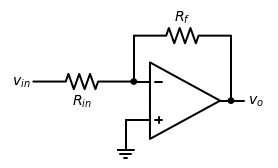

In [11]:
d = schemdraw.Drawing()
d += (op := elm.Opamp())
d += elm.Line().left().at(op.in2).length(d.unit/4)
d += elm.Line().down().length(d.unit/5)
d += elm.Ground()
d += elm.Line().left().at(op.in1).length(d.unit/6)
d += elm.Dot()
d.push()
d += (Rin := elm.Resistor().left().at(Point(op.in1)-Point((d.unit/5,0)))
                          .label('$R_{in}$', loc='bot')
                          .label('$v_{in}$', loc='lft'))
d.pop()
d += elm.Line().up().length(d.unit/2)
d += elm.Resistor().right().label('$R_f$')
d += elm.Line().down().toy(op.out)
d += elm.Dot()
d += elm.Line().left().tox(op.out)
d += elm.Line().right().length(d.unit/4).label('$v_{o}$', loc='rgt')
d.draw()

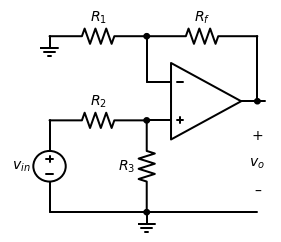

In [12]:
d = schemdraw.Drawing()
d += (op := elm.Opamp())
d += elm.Line(at=op.out).length(.75)
d += elm.Line().left().at(op.in1).length(.75)
d += elm.Line().up().length(1.5)
d += elm.Dot()
d += (R1 := elm.Resistor().left().label('$R_1$'))
d += elm.Ground()
d += (Rf := elm.Resistor().right().at(R1.start).tox(op.out+.5).label('$R_f$'))
d += elm.Line().down().toy(op.out)
d += (dot := elm.Dot())
d += elm.Line().left().at(op.in2).length(.75)
d += elm.Dot()
d += (R3 := elm.Resistor().down().label('$R_3$'))
d += elm.Dot()
d += elm.Ground()
d += (R2 := elm.Resistor().left().at(R3.start).label('$R_2$'))
d += elm.SourceV().down().reverse().label('$v_{in}$')
d += elm.Line().right().tox(Rf.end)
d += elm.Gap().down().at(dot.start).toy(R3.end).label(['+','$v_o$','–'])
d.draw()

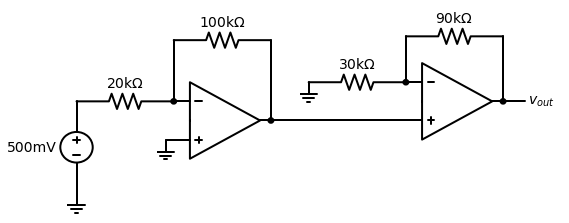

In [16]:
d = schemdraw.Drawing()
d += elm.Ground()
d += elm.SourceV().label('500mV')

d += elm.Resistor().right().label('20k$\Omega$')
d += (Vin := elm.Dot())
d += elm.Line().length(.5)
d += (O1 := elm.Opamp().anchor('in1'))
d += elm.Line().left().length(0.75).at(O1.in2)
d += elm.Ground()
d += elm.Line().up().at(Vin.start).length(2)
d += elm.Resistor().right().label('100k$\Omega$')
d += elm.Line().down().toy(O1.out)
d += elm.Dot()
d += elm.Line().right().at(O1.out).length(5)
d += (O2 := elm.Opamp().anchor('in2'))
d += (Vin2 := elm.Line().left().at(O2.in1).length(0.5))
d += elm.Dot()
d += elm.Resistor().left().label('30k$\Omega$')
d += elm.Ground()
d += elm.Line().up().at(Vin2.end).length(1.5)
d += elm.Resistor().right().label('90k$\Omega$')
d += elm.Line().down().toy(O2.out)
d += elm.Dot()
d += elm.Line().right().at(O2.out).length(1).label('$v_{out}$', loc='rgt')
d.draw()


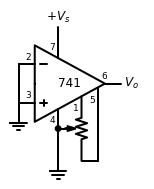

In [24]:
d = schemdraw.Drawing(fontsize=12)
op = (elm.Opamp().label('741', loc='center', ofst=0)
                 .label('1', 'n1', fontsize=9, ofst=(-.1, -.25), halign='right', valign='top')
                 .label('5', 'n1a', fontsize=9, ofst=(-.1, -.25), halign='right', valign='top')
                 .label('4', 'vs', fontsize=9, ofst=(-.1, -.2), halign='right', valign='top')
                 .label('7', 'vd', fontsize=9, ofst=(-.1, .2), halign='right', valign='bottom')
                 .label('2', 'in1', fontsize=9, ofst=(-.1, .1), halign='right', valign='bottom')
                 .label('3', 'in2', fontsize=9, ofst=(-.1, .1), halign='right', valign='bottom')
                 .label('6', 'out', fontsize=9, ofst=(-.1, .1), halign='left', valign='bottom'))
d += op
d += elm.Line().left().at(op.in1).length(0.5)
d += elm.Line().down().length(d.unit/2)
d += elm.Ground()
d += elm.Line().left().at(op.in2).length(0.5)
d += elm.Line().right().at(op.out).length(0.5).label('$V_o$', 'right')
d += elm.Line().up().at(op.vd).length(1).label('$+V_s$', 'right')
d += (trim := elm.Potentiometer().down().at(op.n1).flip().scale(0.7))
d += elm.Line().right().tox(op.n1a)
d += elm.Line().up().to(op.n1a)
d += elm.Line().left().at(trim.tap).tox(op.vs)
d += elm.Dot()
d.push()
d += elm.Line().down().length(d.unit/3)
d += elm.Ground()
d.pop()
d += elm.Line().up().toy(op.vs)
d.draw()

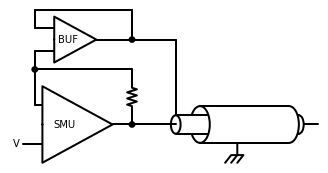

In [30]:
d = schemdraw.Drawing(fontsize=10)
d += elm.Line().length(d.unit/5).label('V', 'left')
d += (smu := elm.Opamp(sign=False).anchor('in2')
                  .label('SMU', 'center', ofst=[-.4, 0], halign='center', valign='center'))
d += elm.Line().at(smu.out).length(d.unit/5)
d.push()
d += elm.Line().length(d.unit/4)
d += (triax := elm.triax(length=5, shieldofststart=.75))
d.pop()
d += elm.Dot()
d += elm.Resistor().up().length(d.unit).scale(0.6)
d += elm.Line().left()
d += elm.Dot()
d.push()
d += elm.Line().down().toy(smu.in1)
d += elm.Line().right().tox(smu.in1)
d.pop()
d += elm.Line().up().length(d.unit/5)
d += elm.Line().right().length(d.unit/5)
d += (buf := elm.Opamp(sign=False).anchor('in2').scale(0.6)
                     .label('BUF', 'center', ofst=(-.4, 0), halign='center', valign='center'))

d += elm.Line().left().at(buf.in1).length(d.unit/5)
d += elm.Line().up().length(d.unit/5)
d += elm.Line().right()
d += elm.Line().down().toy(buf.out)
d += elm.Dot()
d.push()
d += elm.Line().left().tox(buf.out)
d.pop()
d += elm.Line().right().tox(triax.guardstart_top)
d += elm.Line().down().toy(triax.guardstart_top)
d += elm.GroundChassis().at(triax.shieldcenter)
d.draw()


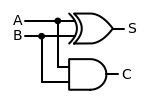

In [32]:
d = schemdraw.Drawing(unit=.5)
d += (S := logic.Xor().label('S', 'right'))
d += (A := logic.Dot().at(S.in1))
d += logic.Line().left().length(d.unit*2).label('A', 'left')
d += logic.Line().left().at(S.in2)
d += (B := logic.Dot())
d += logic.Line().left().label('B', 'left')

d += logic.Line().down().at(A.start).length(d.unit*3)
d += (C := logic.And().right().anchor('in1').label('C', 'right'))
d += logic.Line().down().at(B.start).toy(C.in2)
d += logic.Line().to(C.in2)
d.draw()


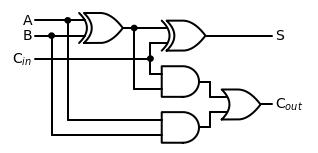

In [35]:
d = schemdraw.Drawing(unit=.5)
d += (X1 := logic.Xor())
d += logic.Dot()
d += (A := logic.Dot().at(X1.in1))
d += (Ain := logic.Line().left().length(d.unit*2).label('A', 'left'))
d += logic.Line().left().at(X1.in2)
d += (B := logic.Dot())
d += logic.Line().left().label('B', 'left')

d += logic.Line().right().at(X1.out).length(d.unit)
d += (X2 := logic.Xor().anchor('in1'))
d += (C := logic.Line().down().at(X2.in2).length(d.unit*2))
d.push()
d += logic.Dot().at(C.center)
d += logic.Line().left().tox(Ain.end).label('C$_{in}$', 'left')
d.pop()

d += (A1 := logic.And().right().anchor('in1'))
d += logic.Line().left().at(A1.in2).tox(X1.out)
d += logic.Line().up().toy(X1.out)
d += (A2 := logic.And().right().anchor('in1').at((A1.in1[0],A1.in2[1]-d.unit*2)))
d += logic.Line().left().at(A2.in1).tox(A.start)
d += logic.Line().up().toy(A.start)
d += logic.Line().left().at(A2.in2).tox(B.start)
d += logic.Line().up().toy(B.start)

d += (O1 := logic.Or().right().at((A1.out[0],(A1.out[1]+A2.out[1])/2))
                .label('C$_{out}$', 'right'))
d += logic.Line().down().at(A1.out).toy(O1.in1)
d += logic.Line().up().at(A2.out).toy(O1.in2)
d += logic.Line().right().at(X2.out).tox(O1.out).label('S', 'right')
d.draw()


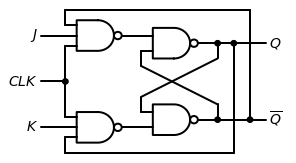

In [16]:
d = schemdraw.Drawing()
# Two front gates (SR latch)
d += (G1 := logic.Nand().anchor('in1'))
d += logic.Line().length(d.unit/6)
d += (Q1 := logic.Dot()
d += logic.Line().length(d.unit/6)
d += (Q2 := logic.Dot())
d += logic.Line().length(d.unit/3).label('Q', 'right')
d += (G2 := logic.Nand().anchor('in1').at((G1.in1[0],G1.in1[1]-2.5)))
d += logic.Line().length(d.unit/6)
d += (Qb := logic.Dot())
d += logic.Line().length(d.unit/3)
d += (Qb2 := logic.Dot())
d += logic.Line().length(d.unit/6).label('$\overline{Q}$', 'right')
S1 = d.add(logic.Line(xy=G2.in1, d='up', l=d.unit/6))
d.add(logic.Line('down', xy=Q1.start, l=d.unit/6))
d.add(logic.Line(to=S1.end))
R1 = d.add(logic.Line('down', xy=G1.in2, l=d.unit/6))
d.add(logic.Line('up', xy=Qb.start, l=d.unit/6))
d.add(logic.Line(to=R1.end))

# Two back gates
d.add(logic.Line('left', xy=G1.in1, l=d.unit/6))
J = d.add(logic.Nand(inputs=3, anchor='out', reverse=True))
d.add(logic.Line('up', xy=J.in3, l=d.unit/6))
d.add(logic.Line('right', tox=Qb2.start))
d.add(logic.Line('down', toy=Qb2.start))
d.add(logic.Line('left', xy=J.in2, l=d.unit/4, lftlabel='$J$'))
d.add(logic.Line('left', xy=G2.in2, l=d.unit/6))
K = d.add(logic.Nand(inputs=3, anchor='out', reverse=True))
d.add(logic.Line('down', xy=K.in1, l=d.unit/6))
d.add(logic.Line('right', tox=Q2.start))
d.add(logic.Line('up', toy=Q2.start))
d.add(logic.Line('left', xy=K.in2, l=d.unit/4, lftlabel='$K$'))
C = d.add(logic.Line('down', xy=J.in1, toy=K.in3))
d.add(logic.Dot(xy=C.center))
d.add(logic.Line('left', xy=C.center, l=d.unit/4, lftlabel='$CLK$'))
d.draw()


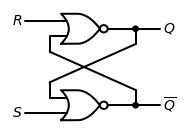

In [17]:
    d = schemdraw.Drawing()
    d.add(logic.Line(l=d.unit/4, lftlabel='$R$'))
    G1 = d.add(logic.Nor(anchor='in1'))
    d.add(logic.Line(l=d.unit/4))
    Q = d.add(logic.Dot)
    d.add(logic.Line(l=d.unit/4, rgtlabel='$Q$'))

    G2 = d.add(logic.Nor(anchor='in1', xy=[G1.in1[0],G1.in1[1]-2.5]))
    d.add(logic.Line(l=d.unit/4))
    Qb = d.add(logic.Dot)
    d.add(logic.Line(l=d.unit/4, rgtlabel='$\overline{Q}$'))
    S1 = d.add(logic.Line('up', xy=G2.in1, l=d.unit/6))
    d.add(logic.Line('down', xy=Q.start, l=d.unit/6))
    d.add(logic.Line(to=S1.end))
    R1 = d.add(logic.Line('down', xy=G1.in2, l=d.unit/6))
    d.add(logic.Line('up', xy=Qb.start, l=d.unit/6))
    d.add(logic.Line(to=R1.end))
    d.add(logic.Line('left', xy=G2.in2, l=d.unit/4, lftlabel='$S$'))
    d.draw()


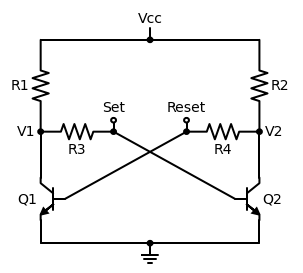

In [18]:
    d = schemdraw.Drawing()
    Q1 = d.add(elm.BjtNpn(circle=True, reverse=True, lftlabel='Q1'))
    Q2 = d.add(elm.BjtNpn(circle=True, xy=[d.unit*2, 0], label='Q2'))
    d.add(elm.Line('up', xy=Q1.collector, l=d.unit/2))

    R1 = d.add(elm.Resistor('up', label='R1', move_cur=False))
    d.add(elm.Dot(lftlabel='V1'))
    d.add(elm.Resistor('right', botlabel='R3', l=d.unit*.75))
    d.add(elm.Dot)
    d.push()
    d.add(elm.Line('up', l=d.unit/8))
    d.add(elm.Dot(open=True, label='Set'))
    d.pop()
    d.add(elm.Line(to=Q2.base))

    d.add(elm.Line('up', xy=Q2.collector, l=d.unit/2))
    d.add(elm.Dot(rgtlabel='V2'))
    R2 = d.add(elm.Resistor('up', botlabel='R2', move_cur=False))
    d.add(elm.Resistor('left', botlabel='R4', l=d.unit*.75))
    d.add(elm.Dot)
    d.push()
    d.add(elm.Line('up', l=d.unit/8))
    d.add(elm.Dot(open=True, label='Reset'))
    d.pop()
    d.add(elm.Line(to=Q1.base))

    d.add(elm.Line('down', xy=Q1.emitter, l=d.unit/4))
    BOT = d.add(elm.Line('right', tox=Q2.emitter))
    d.add(elm.Line(to=Q2.emitter))
    d.add(elm.Dot(xy=BOT.center))
    d.add(elm.Ground(xy=BOT.center))

    TOP = d.add(elm.Line(endpts=[R1.end,R2.end]))
    d.add(elm.Dot(xy=TOP.center))
    d.add(elm.Line('up', xy=TOP.center, l=d.unit/8, rgtlabel='Vcc'))
    d.draw()

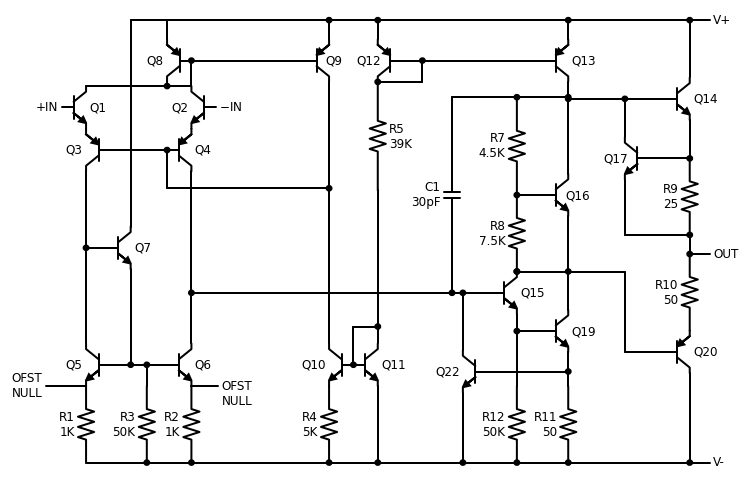

In [19]:
    d = schemdraw.Drawing(fontsize=12, unit=2.5)
    Q1 = d.add(elm.BjtNpn(label='Q1', lftlabel='+IN'))
    Q3 = d.add(elm.BjtPnp('l', xy=Q1.emitter, anchor='emitter', lftlabel='Q3', flip=True))
    d.add(elm.Line('d', xy=Q3.collector))
    d.add(elm.Dot)
    d.push()
    d.add(elm.Line('r', l=d.unit/4))
    Q7 = d.add(elm.BjtNpn(anchor='base', label='Q7'))
    d.pop()
    d.add(elm.Line('d', l=d.unit*1.25))
    Q5 = d.add(elm.BjtNpn('l', anchor='collector', flip=True, lftlabel='Q5'))
    d.add(elm.Line('l', xy=Q5.emitter, l=d.unit/2, lftlabel='OFST\nNULL', move_cur=False))
    d.add(elm.Resistor('d', xy=Q5.emitter, label='R1\n1K'))
    d.add(elm.Line('r', l=d.unit*.75))
    d.add(elm.Dot)
    R3 = d.add(elm.Resistor('u', label='R3\n50K'))
    d.add(elm.Line(toy=Q5.base))
    d.add(elm.Dot)
    d.push()
    d.add(elm.Line('l', to=Q5.base))
    d.add(elm.Line('d', xy=Q7.emitter, toy=Q5.base))
    d.add(elm.DOT)
    d.pop()
    d.add(elm.Line('right', l=d.unit/4))
    Q6 = d.add(elm.BjtNpn(anchor='base', label='Q6'))
    d.add(elm.Line(xy=Q6.emitter, l=d.unit/3, rgtlabel='\nOFST\nNULL', move_cur=False))
    d.add(elm.Resistor('d', xy=Q6.emitter, label='R2\n1K'))
    d.add(elm.Dot)
    
    d.add(elm.Line('u', xy=Q6.collector, toy=Q3.collector))
    Q4 = d.add(elm.BjtPnp('r', anchor='collector', label='Q4'))
    d.add(elm.Line('l', xy=Q4.base, tox=Q3.base))
    d.add(elm.Line('u', xy=Q4.emitter, toy=Q1.emitter))
    Q2 = d.add(elm.BjtNpn('l', anchor='emitter', flip=True, lftlabel='Q2', rgtlabel='$-$IN'))
    d.add(elm.Line('u', xy=Q2.collector, l=d.unit/3))
    d.add(elm.Dot)
    Q8 = d.add(elm.BjtPnp('l', lftlabel='Q8', anchor='base', flip=True))
    d.add(elm.Line('d', xy=Q8.collector, toy=Q2.collector))
    d.add(elm.Dot)
    d.add(elm.Line('l', xy=Q2.collector, tox=Q1.collector))
    d.add(elm.Line('u', xy=Q8.emitter, l=d.unit/4))
    top = d.add(elm.Line('l', tox=Q7.collector))
    d.add(elm.Line('d', toy=Q7.collector))

    d.add(elm.Line('r', xy=top.start, l=d.unit*2))
    d.add(elm.Line('d', l=d.unit/4))
    Q9 = d.add(elm.BjtPnp('r', anchor='emitter', label='Q9', lblofst=-.1))
    d.add(elm.Line('l', xy=Q9.base, tox=Q8.base))
    d.add(elm.Dot(xy=Q4.base))
    d.add(elm.Line('d', xy=Q4.base, l=d.unit/2))
    d.add(elm.Line('r', tox=Q9.collector))
    d.add(elm.Dot)
    d.add(elm.Line('d', xy=Q9.collector, toy=Q6.collector))
    Q10 = d.add(elm.BjtNpn('l', anchor='collector', flip=True, lftlabel='Q10'))
    d.add(elm.Resistor('d', xy=Q10.emitter, toy=R3.start, label='R4\n5K'))
    d.add(elm.Dot)

    Q11 = d.add(elm.BjtNpn('r', xy=Q10.base, anchor='base', label='Q11'))
    d.add(elm.Dot(xy=Q11.base))
    d.add(elm.Line('u', l=d.unit/2))
    d.add(elm.Line('r', tox=Q11.collector))
    d.add(elm.Dot)
    d.add(elm.Line('d', xy=Q11.emitter, toy=R3.start))
    d.add(elm.Dot)
    d.add(elm.Line('u', xy=Q11.collector, l=d.unit*2))
    d.add(elm.Resistor(toy=Q9.collector, botlabel='R5\n39K'))
    Q12 = d.add(elm.BjtPnp('l', anchor='collector', flip=True, lftlabel='Q12', lblofst=-.1))
    d.add(elm.Line('u', xy=Q12.emitter, l=d.unit/4))
    d.add(elm.Dot)
    d.add(elm.Line('l', tox=Q9.emitter))
    d.add(elm.Dot)
    d.add(elm.Line('r', xy=Q12.base, l=d.unit/4))
    d.add(elm.Dot)
    d.push()
    d.add(elm.Line('d', toy=Q12.collector))
    d.add(elm.Line('l', tox=Q12.collector))
    d.add(elm.Dot)
    d.pop()
    d.add(elm.Line('r', l=d.unit*1.5))
    Q13 = d.add(elm.BjtPnp(anchor='base', label='Q13'))
    d.add(elm.Line('u', l=d.unit/4))
    d.add(elm.Dot)
    d.add(elm.Line('l', tox=Q12.emitter))
    K = d.add(elm.Line('d', xy=Q13.collector, l=d.unit/5))
    d.add(elm.Dot)
    d.add(elm.Line('d'))
    Q16 = d.add(elm.BjtNpn('r', anchor='collector', label='Q16', lblofst=-.1))
    d.add(elm.Line('l', xy=Q16.base, l=d.unit/3))
    d.add(elm.Dot)
    R7 = d.add(elm.Resistor('u', toy=K.end, label='R7\n4.5K'))
    d.add(elm.Dot)
    d.add(elm.Line('r', tox=Q13.collector, move_cur=False))
    R8 = d.add(elm.Resistor('d', xy=R7.start, label='R8\n7.5K'))
    d.add(elm.Dot)
    d.add(elm.Line('r', tox=Q16.emitter))
    J = d.add(elm.Dot)
    d.add(elm.Line('u', toy=Q16.emitter))
    Q15 = d.add(elm.BjtNpn('r', anchor='collector', xy=R8.end, label='Q15'))
    d.add(elm.Line('l', xy=Q15.base, l=d.unit/2))
    d.add(elm.Dot)
    C1 = d.add(elm.Capacitor('u', toy=R7.end, label='C1\n30pF'))
    d.add(elm.Line('r', tox=Q13.collector))
    d.add(elm.Line('l', xy=C1.start, tox=Q6.collector))
    d.add(elm.Dot)
    d.add(elm.Line('d', xy=J.center, l=d.unit/2))
    Q19 = d.add(elm.BjtNpn('r', anchor='collector', label='Q19'))
    d.add(elm.Line('l', xy=Q19.base, tox=Q15.emitter))
    d.add(elm.Dot)
    d.add(elm.Line('u', toy=Q15.emitter, move_cur=False))
    d.add(elm.Line('d', xy=Q19.emitter, l=d.unit/4))
    d.add(elm.Dot)
    d.add(elm.Line('left'))
    Q22 = d.add(elm.BjtNpn('l', anchor='base', flip=True, lftlabel='Q22'))
    d.add(elm.Line('u', xy=Q22.collector, toy=Q15.base))
    d.add(elm.Dot)
    d.add(elm.Line('d', xy=Q22.emitter, toy=R3.start))
    d.add(elm.Dot)
    d.add(elm.Line('l', tox=R3.start, move_cur=False))
    d.add(elm.Line('r', tox=Q15.emitter))
    d.add(elm.Dot)
    d.push()
    d.add(elm.Resistor('u', label='R12\n50K'))
    d.add(elm.Line(toy=Q19.base))
    d.pop()
    d.add(elm.Line(tox=Q19.emitter))
    d.add(elm.Dot)
    R11 = d.add(elm.Resistor('u', label='R11\n50'))
    d.add(elm.Line(toy=Q19.emitter))

    d.add(elm.Line('u', xy=Q13.emitter, l=d.unit/4))
    d.add(elm.Line('r', l=d.unit*1.5))
    d.add(elm.Dot)
    d.add(elm.Line(l=d.unit/4, rgtlabel='V+', move_cur=False))
    d.add(elm.Line('d', l=d.unit*.75))
    Q14 = d.add(elm.BjtNpn('r', anchor='collector', label='Q14'))
    d.add(elm.Line('l', xy=Q14.base, l=d.unit/2))
    d.push()
    d.add(elm.Dot)
    d.add(elm.Line('d', l=d.unit/2))
    Q17 = d.add(elm.BjtNpn('l', anchor='collector', flip=True, lftlabel='Q17', lblofst=-.1))
    d.add(elm.Line('r', xy=Q17.base, tox=Q14.emitter))
    d.add(elm.Dot)
    J = d.add(elm.Line('u', toy=Q14.emitter))
    d.pop()
    d.add(elm.Line(tox=Q13.collector))
    d.add(elm.Dot)
    d.add(elm.Resistor('d', xy=J.start, label='R9\n25'))
    d.add(elm.Dot)
    d.push()
    d.add(elm.Line('l', tox=Q17.emitter))
    d.add(elm.Line('u', toy=Q17.emitter))
    d.pop()
    d.add(elm.Line('d', l=d.unit/4))
    d.add(elm.Dot)
    d.add(elm.Line('r', l=d.unit/4, rgtlabel='OUT', move_cur=False))
    d.add(elm.Resistor('d', label='R10\n50'))
    Q20 = d.add(elm.BjtPnp(d='r', anchor='emitter', label='Q20'))
    d.add(elm.Line('l', xy=Q20.base, l=d.unit/2))
    d.add(elm.Line('u', toy=Q15.collector))
    d.add(elm.Line('l', tox=Q15.collector))
    d.add(elm.Dot)
    d.add(elm.Line('d', xy=Q20.collector, toy=R3.start))
    d.add(elm.Dot)
    d.add(elm.Line('r', l=d.unit/4, rgtlabel='V-', move_cur=False))
    d.add(elm.Line('l', tox=R11.start))
    d.draw()


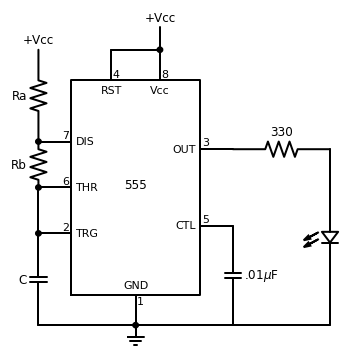

In [20]:
    d = schemdraw.Drawing(fontsize=12)
    IC555def = elm.Ic(pins=[elm.IcPin(name='TRG', side='left', pin='2'),
                            elm.IcPin(name='THR', side='left', pin='6'),
                            elm.IcPin(name='DIS', side='left', pin='7'),
                            elm.IcPin(name='CTL', side='right', pin='5'),
                            elm.IcPin(name='OUT', side='right', pin='3'),
                            elm.IcPin(name='RST', side='top', pin='4'),
                            elm.IcPin(name='Vcc', side='top', pin='8'),
                            elm.IcPin(name='GND', side='bot', pin='1'),],
                       edgepadW=.5,
                       edgepadH=1,
                       pinspacing=1.5,
                       leadlen=1,
                       label='555')
    T = d.add(IC555def)
    BOT = d.add(elm.Ground(xy=T.GND))
    d.add(elm.Dot)
    d.add(elm.Resistor(endpts=[T.DIS, T.THR], label='Rb'))
    d.add(elm.Resistor('u', xy=T.DIS, label='Ra', rgtlabel='+Vcc'))
    d.add(elm.Line(endpts=[T.THR, T.TRG]))
    d.add(elm.Capacitor('d', xy=T.TRG, toy=BOT.start, label='C', l=d.unit/2))
    d.add(elm.Line('r', tox=BOT.start))
    d.add(elm.Capacitor('d', xy=T.CTL, toy=BOT.start, botlabel='.01$\mu$F'))
    d.add(elm.Dot(xy=T.DIS))
    d.add(elm.Dot(xy=T.THR))
    d.add(elm.Dot(xy=T.TRG))
    d.add(elm.Line(endpts=[T.RST,T.Vcc]))
    d.add(elm.Dot)
    d.add(elm.Line('u', l=d.unit/4, rgtlabel='+Vcc'))
    d.add(elm.Resistor('r', xy=T.OUT, label='330'))
    d.add(elm.LED(flip=True, d='down', toy=BOT.start))
    d.add(elm.Line('l', tox=BOT.start))
    d.draw()


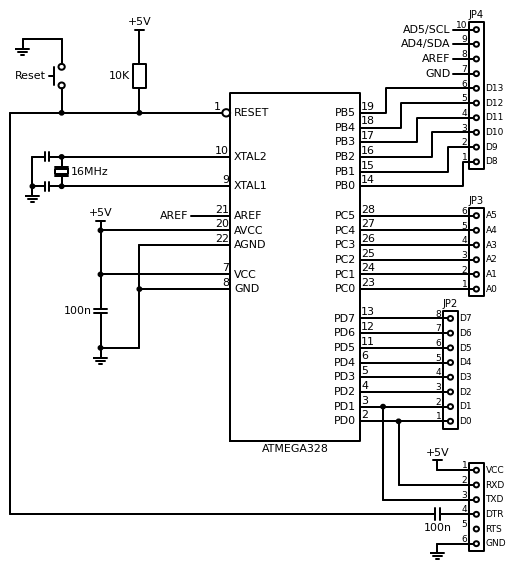

In [21]:
class Atmega328(elm.Ic):
    def __init__(self, *args, **kwargs):
        pins=[elm.IcPin(name='PD0', pin='2', side='r', slot='1/22'),
              elm.IcPin(name='PD1', pin='3', side='r', slot='2/22'),
              elm.IcPin(name='PD2', pin='4', side='r', slot='3/22'),
              elm.IcPin(name='PD3', pin='5', side='r', slot='4/22'),
              elm.IcPin(name='PD4', pin='6', side='r', slot='5/22'),
              elm.IcPin(name='PD5', pin='11', side='r', slot='6/22'),             
              elm.IcPin(name='PD6', pin='12', side='r', slot='7/22'),             
              elm.IcPin(name='PD7', pin='13', side='r', slot='8/22'),
              elm.IcPin(name='PC0', pin='23', side='r', slot='10/22'),
              elm.IcPin(name='PC1', pin='24', side='r', slot='11/22'),
              elm.IcPin(name='PC2', pin='25', side='r', slot='12/22'),
              elm.IcPin(name='PC3', pin='26', side='r', slot='13/22'),
              elm.IcPin(name='PC4', pin='27', side='r', slot='14/22'),
              elm.IcPin(name='PC5', pin='28', side='r', slot='15/22'),
              elm.IcPin(name='PB0', pin='14', side='r', slot='17/22'),
              elm.IcPin(name='PB1', pin='15', side='r', slot='18/22'),
              elm.IcPin(name='PB2', pin='16', side='r', slot='19/22'),
              elm.IcPin(name='PB3', pin='17', side='r', slot='20/22'),
              elm.IcPin(name='PB4', pin='18', side='r', slot='21/22'),
              elm.IcPin(name='PB5', pin='19', side='r', slot='22/22'),
    
              elm.IcPin(name='RESET', side='l', slot='22/22', invert=True, pin='1'),
              elm.IcPin(name='XTAL2', side='l', slot='19/22', pin='10'),
              elm.IcPin(name='XTAL1', side='l', slot='17/22', pin='9'),
              elm.IcPin(name='AREF', side='l', slot='15/22', pin='21'),
              elm.IcPin(name='AVCC', side='l', slot='14/22', pin='20'),
              elm.IcPin(name='AGND', side='l', slot='13/22', pin='22'),
              elm.IcPin(name='VCC', side='l', slot='11/22', pin='7'),
              elm.IcPin(name='GND', side='l', slot='10/22', pin='8')]
        super().__init__(pins=pins, w=5, plblofst=.05, botlabel='ATMEGA328', **kwargs)


d = schemdraw.Drawing(fontsize=11, inches_per_unit=.4)
Q1 = d.add(Atmega328())
JP4 = d.add(elm.Header(rows=10, shownumber=True, flip=True, at=[Q1.PB5[0]+4, Q1.PB5[1]+1], anchor='pin6', label='JP4', fontsize=10,
                       pinsright=['D8', 'D9', 'D10', 'D11', 'D12', 'D13', '', '', '', ''], pinalignright='center'))
JP3 = d.add(elm.Header(rows=6, shownumber=True, flip=True, at=[Q1.PC5[0]+4, Q1.PC5[1]], anchor='pin6', label='JP3', fontsize=10,
                       pinsright=['A0', 'A1', 'A2', 'A3', 'A4', 'A5'], pinalignright='center'))

JP2 = d.add(elm.Header(rows=8, shownumber=True, flip=True, at=[Q1.PD7[0]+3, Q1.PD7[1]], anchor='pin8', label='JP2', fontsize=10,
                       pinsright=['D0', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7'], pinalignright='center'))

d.add(elm.OrthoLines(at=Q1.PB5, to=JP4.pin6, n=6))
d.add(elm.OrthoLines(at=Q1.PC5, to=JP3.pin6, n=6))
d.add(elm.OrthoLines(at=Q1.PD7, to=JP2.pin8, n=8))

d.add(elm.Line('l', at=JP4.pin7, l=.9, lftlabel='GND'))
d.add(elm.Line('l', at=JP4.pin8, l=.9, lftlabel='AREF'))
d.add(elm.Line('l', at=JP4.pin9, l=.9, lftlabel='AD4/SDA'))
d.add(elm.Line('l', at=JP4.pin10, l=.9, lftlabel='AD5/SCL'))

JP1 = d.add(elm.Header('r', at=[Q1.PD0[0]+4, Q1.PD0[1]-2], rows=6, anchor='pin1', shownumber=True,
                       pinsright=['VCC', 'RXD', 'TXD', 'DTR', 'RTS', 'GND'], pinalignright='center'))
d.add(elm.Line('l', at=JP1.pin1, l=d.unit/2))
d.add(elm.Vdd(label='+5V'))
d.add(elm.Line('l', at=JP1.pin2, l=d.unit))
d.add(elm.Line('u', toy=Q1.PD0))
d.add(elm.Dot)
d.add(elm.Line('l', at=JP1.pin3, l=d.unit+0.6))
d.add(elm.Line('u', toy=Q1.PD1))
d.add(elm.Dot)
d.add(elm.Line('l', at=JP1.pin6, l=d.unit/2))
d.add(elm.Ground)

d.add(elm.Line('l', at=Q1.XTAL2, l=d.unit*2))
d.add(elm.Dot)
d.push()
d.add(elm.Capacitor('l', zoom=.75, l=d.unit/2))
d.add(elm.Line('d', toy=Q1.XTAL1))
d.add(elm.Dot)
d.add(elm.Ground)
d.add(elm.Capacitor('r', zoom=.75, l=d.unit/2))
d.add(elm.Dot)
d.pop()
d.add(elm.Crystal('d', botlabel='16MHz', toy=Q1.XTAL1))
d.add(elm.Line('r', tox=Q1.XTAL1))

d.add(elm.Line('l', at=Q1.AREF, l=d.unit/3, lftlabel='AREF'))
d.add(elm.Line('l', at=Q1.AVCC, l=1.5*d.unit))
d.add(elm.Vdd(label='+5V'))
d.add(elm.Dot)
d.add(elm.Line('d', toy=Q1.VCC))
d.add(elm.Dot)
d.add(elm.Line('r', tox=Q1.VCC, move_cur=False))
d.add(elm.Capacitor('d', label='100n'))
GND = d.add(elm.Ground)

d.add(elm.Line('l', at=Q1.AGND))
d.add(elm.Line('d', toy=Q1.GND))
d.add(elm.Dot)
d.add(elm.Line('r', tox=Q1.GND, move_cur=False))
d.add(elm.Line('d', toy=GND.xy))
d.add(elm.Line('l', tox=GND.xy))
d.add(elm.Dot)

d.add(elm.Line('l', at=Q1.RESET))
d.add(elm.Dot)
d.push()
d.add(elm.RBox('u', label='10K'))
d.add(elm.Vdd(label='+5V'))
d.pop()
d.add(elm.Line('l'))
d.push()
d.add(elm.Dot)
RST = d.add(elm.Button('up', label='Reset'))
d.add(elm.Line('l', l=d.unit/2))
d.add(elm.Ground)
d.pop()

d.add(elm.Capacitor('l', at=JP1.pin4, botlabel='100n'))
d.add(elm.Line('l', tox=RST.start[0]-2))
d.add(elm.Line('u', toy=Q1.RESET))
d.add(elm.Line('r', tox=RST.start))

d.draw()

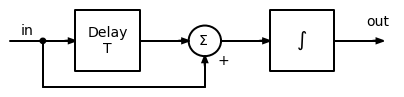

In [22]:
    d = schemdraw.Drawing()
    d.add(dsp.Line(l=d.unit/3, label='in'))
    inpt = d.add(dsp.Dot)
    d.add(dsp.Arrow(l=d.unit/3))
    delay = d.add(dsp.Box(w=2, h=2, label='Delay\nT', anchor='W'))
    d.add(dsp.Arrow('right', l=d.unit/2, xy=delay.E))
    sm = d.add(dsp.SumSigma)
    d.add(dsp.Arrow(xy=sm.E, l=d.unit/2))
    intg = d.add(dsp.Box(w=2, h=2, label='$\int$', anchor='W'))
    d.add(dsp.Line('r', xy=intg.E, l=d.unit/2))
    d.add(dsp.Arrowhead(label='out'))
    d.add(dsp.Line('down', xy=inpt.center, l=d.unit/2))
    d.add(dsp.Line('right', tox=sm.S))
    d.add(dsp.Line('up', toy=sm.S))
    d.add(dsp.Arrowhead(botlabel='+'))
    d.draw()


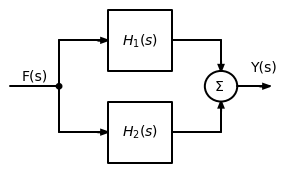

In [23]:
    d = schemdraw.Drawing(fontsize=14)
    d.add(dsp.Line(l=d.unit/2, label='F(s)'))
    d.push()
    d.add(dsp.Dot)
    d.add(dsp.Line('up', l=d.unit/2))
    d.add(dsp.Arrow('right', l=d.unit/2))
    h1 = d.add(dsp.Box(w=2, h=2, label='$H_1(s)$', anchor='W'))
    d.pop()
    d.add(dsp.Line('down', l=d.unit/2))
    d.add(dsp.Arrow('right', l=d.unit/2))
    h2 = d.add(dsp.Box(w=2, h=2, label='$H_2(s)$', anchor='W'))
    sm = d.add(dsp.SumSigma('right', xy=[h1.E[0] + d.unit/2, 0], anchor='center'))
    d.add(dsp.Line('right', xy=h1.E, tox=sm.N))
    d.add(dsp.Arrow('down', toy=sm.N))
    d.add(dsp.Line('right', xy=h2.E, tox=sm.S))
    d.add(dsp.Arrow('up', toy=sm.S))
    d.add(dsp.Line('right', xy=sm.E, l=d.unit/3))
    d.add(dsp.Arrowhead(label='Y(s)'))
    d.draw()

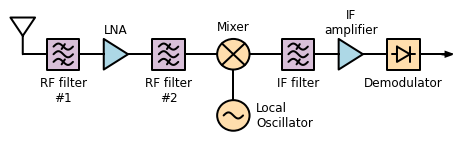

In [24]:
    d = schemdraw.Drawing(fontsize=12)
    d.add(dsp.Antenna)
    d.add(dsp.Line('right', l=d.unit/4))
    filt1 = d.add(dsp.Filter(response='bp', botlabel='RF filter\n#1', anchor='W', lblofst=.2, fill='thistle'))
    d.add(dsp.Line(xy=filt1.E, l=d.unit/4))
    d.add(dsp.Amp(label='LNA', fill='lightblue'))
    d.add(dsp.Line(l=d.unit/4))
    filt2 = d.add(dsp.Filter(response='bp', botlabel='RF filter\n#2', anchor='W', lblofst=.2, fill='thistle'))
    d.add(dsp.Line('right', xy=filt2.E, l=d.unit/3))
    mix = d.add(dsp.Mixer(label='Mixer', fill='navajowhite'))
    d.add(dsp.Line('down', xy=mix.S, l=d.unit/3))
    d.add(dsp.Oscillator('right', rgtlabel='Local\nOscillator', lblofst=.2, anchor='N', fill='navajowhite'))
    d.add(dsp.Line('right', xy=mix.E, l=d.unit/3))
    filtIF = d.add(dsp.Filter(response='bp', anchor='W', botlabel='IF filter', lblofst=.2, fill='thistle'))
    d.add(dsp.Line('right', xy=filtIF.E, l=d.unit/4))
    d.add(dsp.Amp(label='IF\namplifier', fill='lightblue'))
    d.add(dsp.Line(l=d.unit/4))
    demod = d.add(dsp.Demod(anchor='W', botlabel='Demodulator', lblofst=.2, fill='navajowhite'))
    d.add(dsp.Arrow('right', xy=demod.E, l=d.unit/3))
    d.draw()

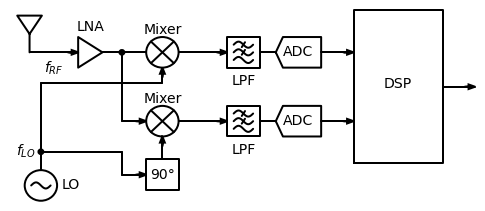

In [25]:
    d = schemdraw.Drawing()
    d.add(dsp.Antenna)
    d.add(dsp.Arrow('right', l=d.unit/2, botlabel='$f_{RF}$'))
    d.add(dsp.Amp(label='LNA'))
    d.add(dsp.Line('right', l=d.unit/5))
    d.add(dsp.Dot)
    d.push()
    d.add(dsp.Line(l=d.unit/4))
    mix1 = d.add(dsp.Mixer(label='Mixer', lblofst=0))
    d.add(dsp.Arrow(l=d.unit/2))
    lpf1 = d.add(dsp.Filter(response='lp', botlabel='LPF', lblofst=.2))
    d.add(dsp.Line(l=d.unit/6))
    adc1 = d.add(dsp.Adc(label='ADC'))
    d.add(dsp.Arrow(l=d.unit/3))
    dsp1 = d.add(dsp.Ic(pins=[dsp.IcPin(side='L'), dsp.IcPin(side='L'), dsp.IcPin(side='R')],
                        size=(2.75, 5), leadlen=0, anchor='inL2', label='DSP'))
    d.add(dsp.Arrow(xy=dsp1.inR1, l=d.unit/3))
    d.pop()

    d.add(dsp.Line('down', toy=dsp1.inL1))
    d.add(dsp.Arrow('right', tox=mix1.W))
    mix2 = d.add(dsp.Mixer(label='Mixer', lblofst=0))
    d.add(dsp.Arrow(tox=lpf1.W))
    d.add(dsp.Filter(response='lp', botlabel='LPF', lblofst=.2))
    d.add(dsp.Line(tox=adc1.W))
    d.add(dsp.Adc(label='ADC'))
    d.add(dsp.Arrow(to=dsp1.inL1))

    d.add(dsp.Arrowhead(xy=mix1.S, d='up'))
    d.add(dsp.Line('down', xy=mix1.S, l=d.unit/6))
    d.add(dsp.Line('left', l=d.unit*1.25))
    d.add(dsp.Line('down', l=d.unit*.75))
    flo = d.add(dsp.Dot(lftlabel='$f_{LO}$'))
    d.push()
    d.add(dsp.Line('down', l=d.unit/5))
    d.add(dsp.Oscillator('right', rgtlabel='LO', anchor='N', lblofst=.15))
    d.pop()
    d.add(dsp.Arrowhead('up', xy=mix2.S))
    d.add(dsp.Line('down', xy=mix2.S, l=d.unit/4))
    b1 = d.add(dsp.Square('right', label='90°', anchor='N'))
    d.add(dsp.Arrowhead('right', xy=b1.W))
    d.add(dsp.Line('left', xy=b1.W, l=d.unit/4))
    d.add(dsp.Line('up', toy=flo.center))
    d.add(dsp.Line('left', tox=flo.center))
    d.draw()


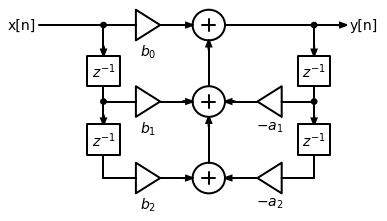

In [26]:
    d = schemdraw.Drawing(unit=1, fontsize=14)
    d.add(dsp.Line(lftlabel='x[n]', l=d.unit*2))
    d.add(dsp.Dot)

    d.push()
    d.add(dsp.Line('right'))
    d.add(dsp.Amp(botlabel='$b_0$'))
    d.add(dsp.ARROW)
    s0 = d.add(dsp.Sum(anchor='W'))
    d.pop()

    d.add(dsp.Arrow('down'))
    z1 = d.add(dsp.Square(label='$z^{-1}$'))
    d.add(dsp.Line(l=d.unit/2))
    d.add(dsp.DOT)

    d.push()
    d.add(dsp.Line('right'))
    d.add(dsp.Amp(botlabel='$b_1$'))
    d.add(dsp.Arrow)
    s1 = d.add(dsp.Sum(anchor='W'))
    d.pop()

    d.add(dsp.Arrow('down', l=d.unit*.75))
    d.add(dsp.Square(label='$z^{-1}$'))
    d.add(dsp.Line(l=d.unit*.75))
    d.add(dsp.Line('right'))
    d.add(dsp.Amp(botlabel='$b_2$'))
    d.add(dsp.Arrow)
    s2 = d.add(dsp.Sum(anchor='W'))

    d.add(dsp.Arrow('up', xy=s2.N, toy=s1.S))
    d.add(dsp.Arrow('up', xy=s1.N, toy=s0.S))

    d.add(dsp.LineDot('right', xy=s0.E, l=d.unit*2.75))
    d.push()
    d.add(dsp.Arrow('right', rgtlabel='y[n]'))
    d.pop()
    d.add(dsp.Arrow('down'))
    d.add(dsp.Square(label='$z^{-1}$'))
    d.add(dsp.Line(l=d.unit/2))
    d.add(dsp.Dot)
    d.push()
    d.add(dsp.Line('left'))
    a1 = d.add(dsp.Amp(botlabel='$-a_1$'))
    d.add(dsp.Arrow(xy=a1.out, tox=s1.E))
    d.pop()

    d.add(dsp.Arrow('down', l=d.unit*.75))
    d.add(dsp.Square(label='$z^{-1}$'))
    d.add(dsp.Line(l=d.unit*.75))
    d.add(dsp.Line('left'))
    a1 = d.add(dsp.Amp(botlabel='$-a_2$'))
    d.add(dsp.Arrow(xy=a1.out, tox=s2.E))
    d.draw()


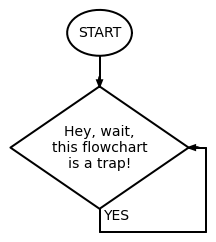

In [27]:
    d = schemdraw.Drawing()
    d.add(flow.Start(w=2, h=1.5, label='START'))
    d.add(flow.Arrow('down', l=d.unit/3))
    h = d.add(flow.Decision(w=5.5, h=4, S='YES', label='Hey, wait,\nthis flowchart\nis a trap!'))
    d.add(flow.Line('down', l=d.unit/4))
    d.add(flow.Line('right', l=d.unit*1.1))
    d.add(flow.Line('up', toy=h.E))
    d.add(flow.Arrow('left', tox=h.E))
    d.draw()


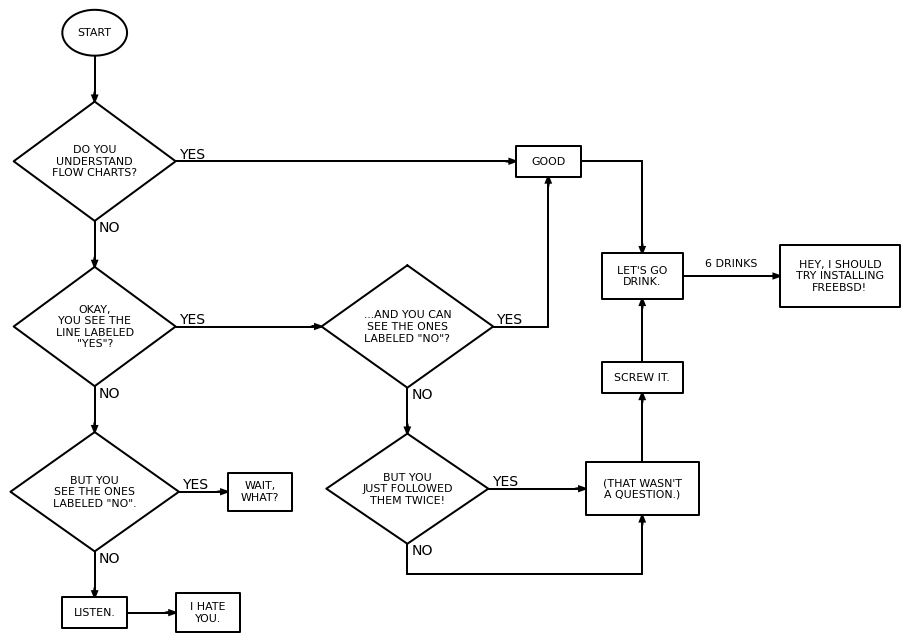

In [28]:
    d = schemdraw.Drawing(fontsize=11)
    b = d.add(flow.Start(w=2, h=1.5, label='START'))
    d.add(flow.Arrow('down', l=d.unit/2))
    d1 = d.add(flow.Decision(w=5, h=3.9, E='YES', S='NO', label='DO YOU\nUNDERSTAND\nFLOW CHARTS?'))
    d.add(flow.Arrow(l=d.unit/2))
    d2 = d.add(flow.Decision(w=5, h=3.9, E='YES', S='NO', label='OKAY,\nYOU SEE THE\nLINE LABELED\n"YES"?'))
    d.add(flow.Arrow(l=d.unit/2))
    d3 = d.add(flow.Decision(w=5.2, h=3.9, E='YES', S='NO', label='BUT YOU\nSEE THE ONES\nLABELED "NO".'))

    d.add(flow.Arrow('right', xy=d3.E, l=d.unit/2))
    d.add(flow.Box(w=2, h=1.25, label='WAIT,\nWHAT?', anchor='W'))
    d.add(flow.Arrow('down', xy=d3.S, l=d.unit/2))
    listen = d.add(flow.Box(w=2, h=1, label='LISTEN.'))
    d.add(flow.Arrow('right', xy=listen.E, l=d.unit/2))
    hate = d.add(flow.Box(w=2, h=1.25, label='I HATE\nYOU.', anchor='W'))

    d.add(flow.Arrow('right', xy=d1.E, l=d.unit*3.5))
    good = d.add(flow.Box(w=2, h=1, label='GOOD', anchor='W'))
    d.add(flow.Arrow('right', xy=d2.E, l=d.unit*1.5))
    d4 = d.add(flow.Decision(w=5.3, h=4.0, E='YES', S='NO', label='...AND YOU CAN\nSEE THE ONES\nLABELED "NO"?', anchor='W'))

    d.add(flow.Line('right', xy=d4.E, tox=good.S))
    d.add(flow.Arrow('up', toy=good.S))
    d.add(flow.Arrow('down', xy=d4.S, l=d.unit/2))
    d5 = d.add(flow.Decision(w=5, h=3.6, E='YES', S='NO', label='BUT YOU\nJUST FOLLOWED\nTHEM TWICE!'))
    d.add(flow.Arrow('right', xy=d5.E, l=d.unit))
    question = d.add(flow.Box(w=3.5, h=1.75, label="(THAT WASN'T\nA QUESTION.)", anchor='W'))
    d.add(flow.Line('down', xy=d5.S, l=d.unit/3))
    d.add(flow.Line('right', tox=question.S))
    d.add(flow.Arrow('up', toy=question.S))

    d.add(flow.Line('right', xy=good.E, tox=question.S))
    d.add(flow.Arrow('down', l=d.unit))
    drink = d.add(flow.Box(w=2.5, h=1.5, label="LET'S GO\nDRINK."))
    d.add(flow.Arrow('right', xy=drink.E, label='6 DRINKS'))
    d.add(flow.Box(w=3.7, h=2, label='HEY, I SHOULD\nTRY INSTALLING\nFREEBSD!', anchor='W'))
    d.add(flow.Arrow('up', xy=question.N, l=d.unit*.75))
    screw = d.add(flow.Box(w=2.5, h=1, label='SCREW IT.', anchor='S'))
    d.add(flow.Arrow('up', xy=screw.N, toy=drink.S))
    d.draw()


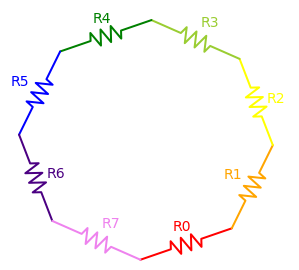

In [29]:
    d = schemdraw.Drawing()
    for i, color in enumerate(['red', 'orange', 'yellow', 'yellowgreen', 'green', 'blue', 'indigo', 'violet']):
        d.add(elm.Resistor(label='R{}'.format(i), theta=45*i+20, color=color))
    d.draw()

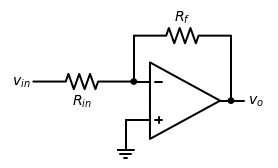

In [30]:
#import matplotlib.pyplot as plt
#plt.xkcd()

d = schemdraw.Drawing(inches_per_unit=.5)
op = d.add(elm.Opamp)
d.add(elm.Line('left', xy=op.in2, l=d.unit/4))
d.add(elm.Line('down', l=d.unit/5))
d.add(elm.Ground)
d.add(elm.Line('left', xy=op.in1, l=d.unit/6))
d.add(elm.Dot)
d.push()
Rin = d.add(elm.Resistor('left', xy=Point(op.in1)-Point((d.unit/5,0)), botlabel='$R_{in}$', lftlabel='$v_{in}$'))
d.pop()
d.add(elm.Line('up', l=d.unit/2))
Rf = d.add(elm.Resistor('right', l=d.unit*1, label='$R_f$'))
d.add(elm.Line('down', toy=op.out))
d.add(elm.Dot)
d.add(elm.Line('left', tox=op.out))
d.add(elm.Line('right', l=d.unit/4, rgtlabel='$v_{o}$'))
d.draw()
